# The Sparks Foundation - #GRIPJUNE21
## Name : Saloni Shingade
# Task - 01 : Prediction using Superwised ML 
# Predict the percentage of a student based on the no. of hours studied per day.

In [ ]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Reading the dataset through given link
df = pd.read_csv("http://bit.ly/w-data")
df.head(8)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60


In [4]:
# checking whether there are any NA values in the dataset
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

### As there are no NA values there is no need to clean the data.
### Now plotting the data using scatter plot.

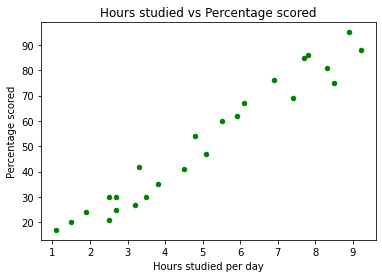

In [5]:
df.plot(x='Hours',y='Scores', kind="scatter", color="green")
plt.title("Hours studied vs Percentage scored")
plt.xlabel("Hours studied per day")
plt.ylabel("Percentage scored")
plt.show()

## In above grapch the relationship between 'Hours' and 'Score' is a positive linear realtionship therefore, we will use a linear regression model for prediction.  

### Storing the 'Hours' in x and 'Score' in y. 

In [6]:
x = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [7]:
print("Dataset : \n",df)
print(" x is : \n",x)
print(" y is : \n",y)

Dataset : 
     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86
 x is : 
 [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
 y is : 
 [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


### Splitting data into testing sets and training sets. 

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
# Testing size is 0.2(20%), that means the testing set has 5 entries and remaining 20 entries are given to the training set.

### Now, constructing a model and then train it. 

In [9]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

print("Training complete.")

Training complete.


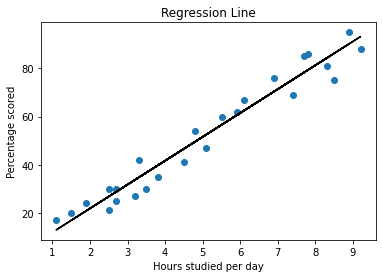

In [10]:
# Regression line as y = mx + c
line = (reg.coef_)*x + reg.intercept_ 
plt.title("Regression Line")
plt.xlabel("Hours studied per day")
plt.ylabel("Percentage scored")

plt.scatter(x ,y)
plt.plot(x, line, color="black")
plt.show()

## In the above graph, we can see that most of the data points are clustered near to the regression line. Therefore, we have chosen the correct model.



### Next, testing of the model.

In [11]:
y_pred = reg.predict(x_test)

In [12]:
df = pd.DataFrame({'Actual score': y_test, 'Predicted score': y_pred})
print(df)

   Actual score  Predicted score
0            20        16.884145
1            27        33.732261
2            69        75.357018
3            30        26.794801
4            62        60.491033


<AxesSubplot:>

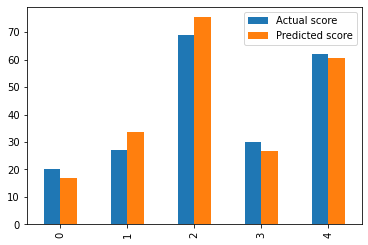

In [13]:
df.plot(kind='bar')

## We can see that the actual score and predicted score don't have much difference i.e. they are nearly same.




### Prediction of the score for the student studying 9.25 hours per day.

In [14]:
hours = 9.25
pred = reg.predict([[hours]])
print("The predicted score for student who studies for 9.25 hours a day is ",pred[0])

The predicted score for student who studies for 9.25 hours a day is  93.69173248737538


## Evaluation of model

In [15]:
from sklearn import metrics
print('r score :',reg.score(x_test, y_test))
print('mean absolute error :',metrics.mean_absolute_error(y_test, y_pred))
print('mean squared error :',metrics.mean_squared_error(y_test, y_pred))

r score : 0.9454906892105356
mean absolute error : 4.183859899002975
mean squared error : 21.5987693072174


## Accuracy of the model is 0.94 that is 94%.

### Mean absolute error is 4.14  and Mean squared error is 21.59



# Conclusion : In this way I have predicted the percentage score of student based on no. of hours studied using Supervised ML.